 ### Netflix Project 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


### load the Data

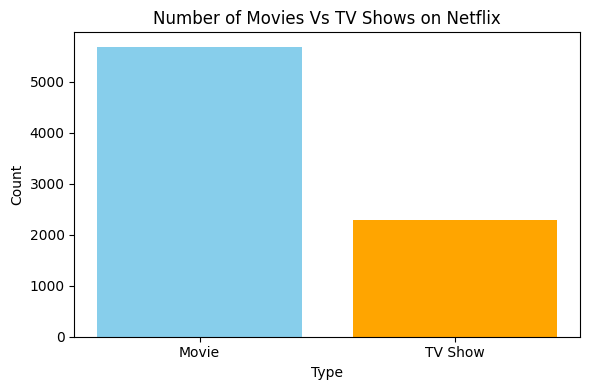

In [3]:
df= pd.read_csv("netflix_titles.csv")

# Clean Data
df = df.dropna(subset=['type','release_year','rating','country','duration',])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of Movies Vs TV Shows on Netflix')
plt.tight_layout()
plt.savefig('movie_vs_tvshows.png')
plt.show()

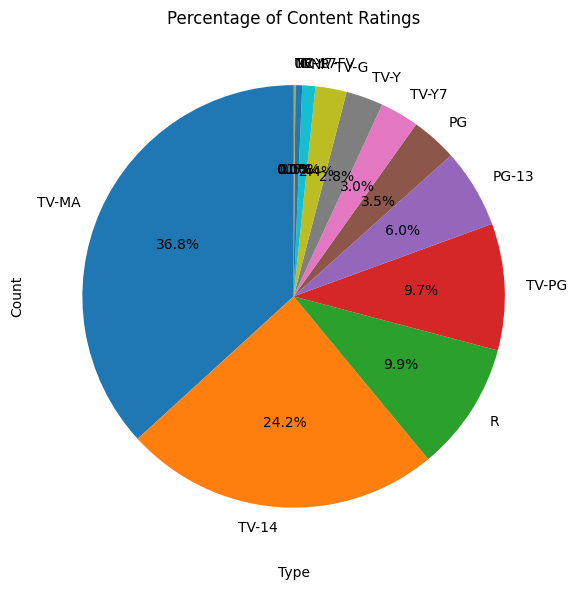

In [4]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels =rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

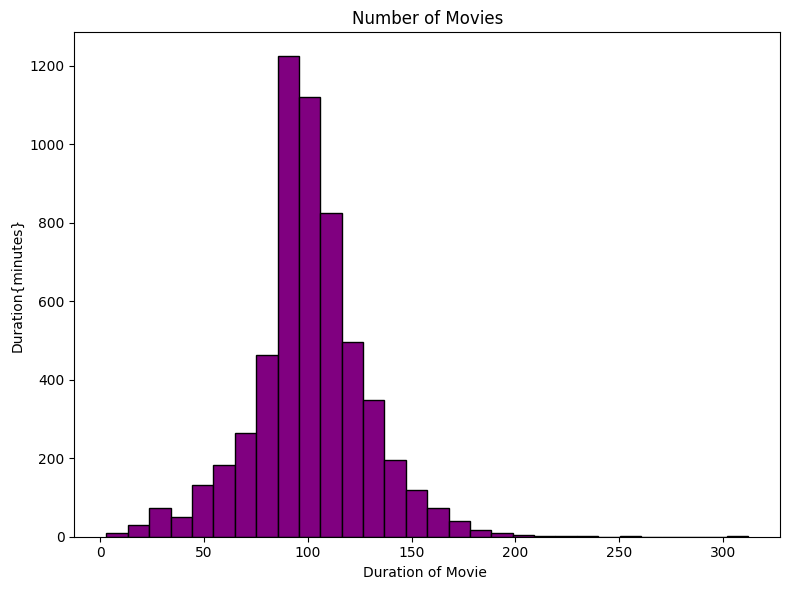

In [5]:
movies_df= df[df['type']=='Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'], bins=30, color = 'purple',edgecolor='black')
plt.xlabel('Duration of Movie ')
plt.ylabel('Duration{minutes}')
plt.title('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duriation_hist.png')
plt.show()

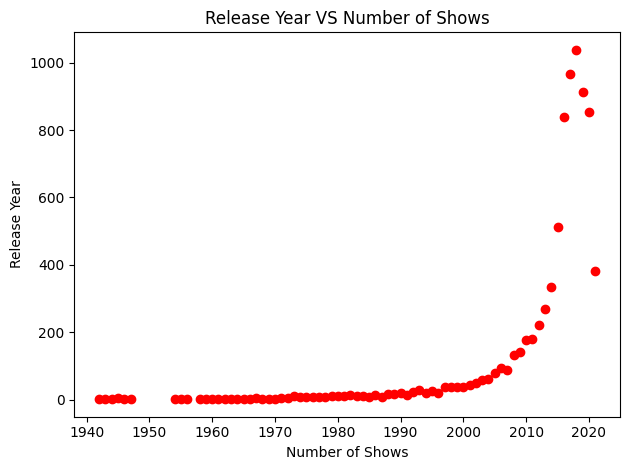

In [6]:
release_counts = df['release_year'].value_counts().sort_index()
plt.Figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.xlabel('Number of Shows')
plt.ylabel('Release Year')
plt.title('Release Year VS Number of Shows')
plt.tight_layout()
plt.savefig('Release_Year_scatter.png')
plt.show()

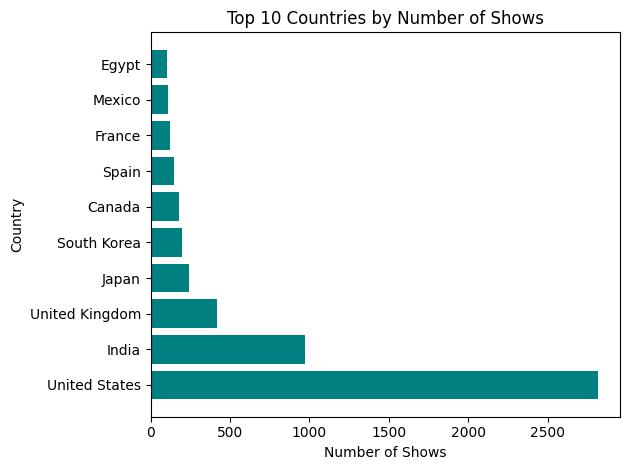

In [7]:
country_counts = df['country'].value_counts().head(10)
plt.Figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Shows')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

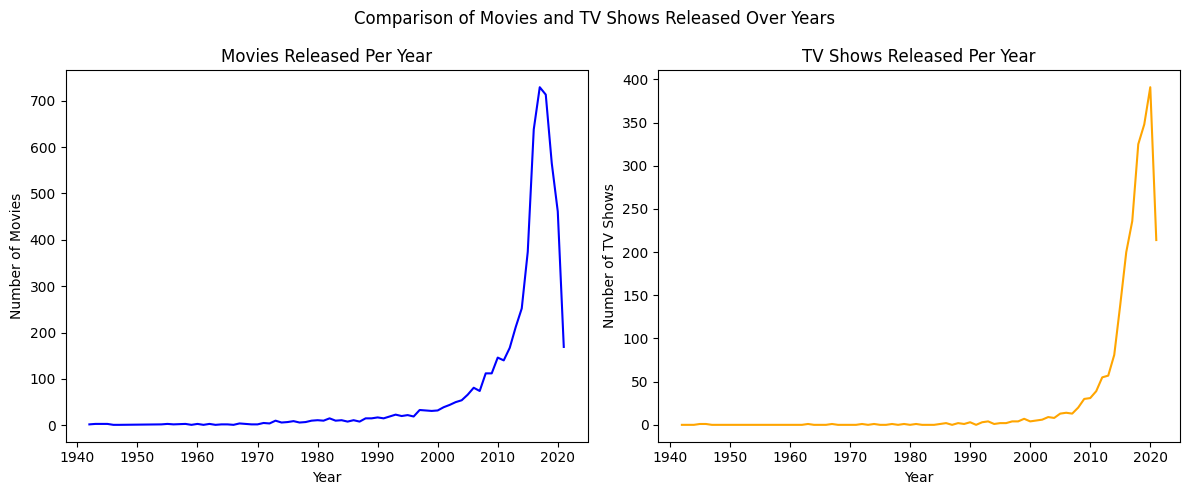

In [8]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Movies Released Per Year')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].set_title('TV Shows Released Per Year')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()